In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


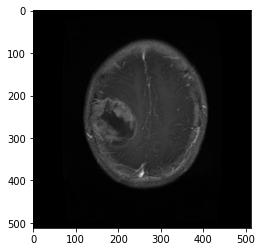

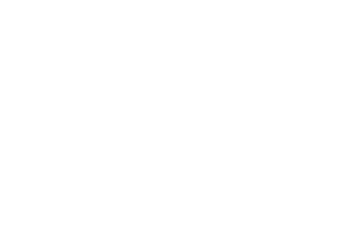

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 255.5, 255.5, -0.5)

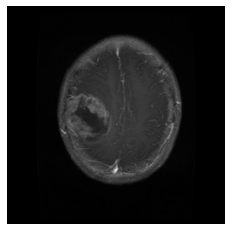

In [ ]:
#Reshaping all the images to 256X256
IMG_SIZE = 256
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
X_train = []
y_train = []
for features_train,label_train in training_data:
    X_train.append(features_train)
    y_train.append(label_train)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_train.shape)
X_train = X_train/255.0  
X_train = X_train.reshape(-1,256,256,1)


(2881, 256, 256)


Load the test images in the same way

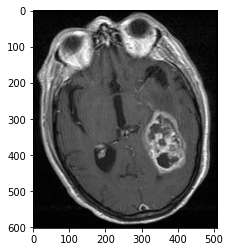

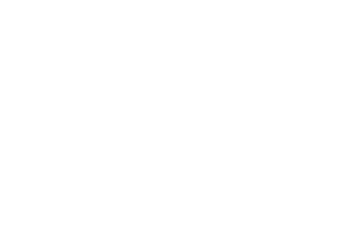

In [ ]:
DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Testing"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 255.5, 255.5, -0.5)

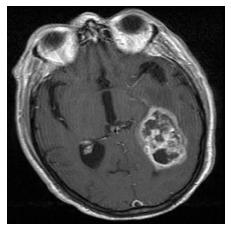

In [ ]:
#Reshaping all the images to 256X256
IMG_SIZE = 256
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array1,cmap = "gray")
plt.axis("off")

In [ ]:
#Storing all the testing images
test_data = []
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE)) 
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

In [ ]:

X_test = []
y_test = []
for features_test,label_test in test_data:
    X_test.append(features_test)
    y_test.append(label_test)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,256,256,1)



(402, 256, 256)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical as ms 

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)

In [ ]:

from keras.datasets import cifar10

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:

from tensorflow.keras import losses
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


basemodel = keras.applications.inception_resnet_v2.InceptionResNetV2( 
    weights="imagenet",
    input_tensor=keras.Input(shape=(256, 256, 3)),
    include_top=False
)

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
# Freeze the basemodel weights , so these weights won't change during training
basemodel.trainable = False

In [ ]:
from tensorflow import image,convert_to_tensor
x_train_=image.grayscale_to_rgb(
    convert_to_tensor(X_train)
)
x_test_=image.grayscale_to_rgb(
    convert_to_tensor(X_test)
)

In [ ]:
# Add classification head to the model

headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = 'global_average_pool')(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)

headmodel = Dense(4, activation = 'softmax', name = 'dense_1')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
  
)

In [ ]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer= opt , metrics= ["accuracy"])

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)



history = model.fit(x_train_,y_train_encoded, epochs = 10, validation_data=(x_test_,y_test_encoded),batch_size=32)

Epoch 1/10
91/91 [==============================] - 42s 298ms/step - loss: 1.4817 - accuracy: 0.2879 - val_loss: 1.6555 - val_accuracy: 0.2189
Epoch 2/10
91/91 [==============================] - 23s 257ms/step - loss: 1.4619 - accuracy: 0.2846 - val_loss: 1.6284 - val_accuracy: 0.2338
Epoch 3/10
91/91 [==============================] - 24s 264ms/step - loss: 1.4399 - accuracy: 0.2872 - val_loss: 1.6061 - val_accuracy: 0.2463
Epoch 4/10
91/91 [==============================] - 25s 274ms/step - loss: 1.4298 - accuracy: 0.2966 - val_loss: 1.5883 - val_accuracy: 0.2562
Epoch 5/10
91/91 [==============================] - 25s 275ms/step - loss: 1.4193 - accuracy: 0.2824 - val_loss: 1.5726 - val_accuracy: 0.2587
Epoch 6/10
91/91 [==============================] - 24s 269ms/step - loss: 1.3983 - accuracy: 0.2910 - val_loss: 1.5626 - val_accuracy: 0.2562
Epoch 7/10
91/91 [==============================] - 24s 268ms/step - loss: 1.3986 - accuracy: 0.2979 - val_loss: 1.5520 - val_accuracy: 0.2687

In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac= accuracy_score(y_test, y_pred_test_classes)

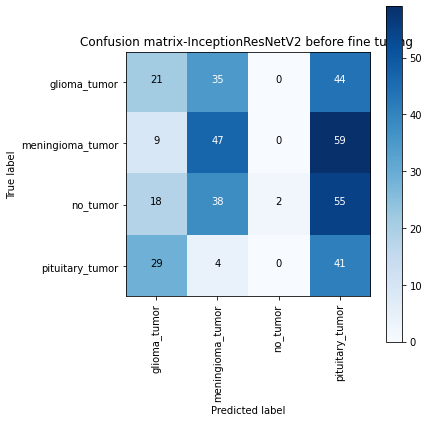

In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-InceptionResNetV2 before fine tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)

In [ ]:
# unfreeze the weights in the base model, now these weights will be changed during training
basemodel.trainable = True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
opt= tf. keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam",
  
)

In [ ]:
# fine tune the model with very low learning rate
model.compile(loss = 'categorical_crossentropy', optimizer= opt , metrics= ["accuracy"])
history = model.fit(x_train_,y_train_encoded,  epochs = 20, validation_data= (x_test_,y_test_encoded))

Epoch 1/20
91/91 [==============================] - 91s 842ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.4810 - val_accuracy: 0.7761
Epoch 2/20
91/91 [==============================] - 73s 805ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 1.5088 - val_accuracy: 0.7687
Epoch 3/20
91/91 [==============================] - 74s 811ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 1.4866 - val_accuracy: 0.7587
Epoch 4/20
91/91 [==============================] - 74s 809ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 1.4242 - val_accuracy: 0.7562
Epoch 5/20
91/91 [==============================] - 74s 809ms/step - loss: 0.0048 - accuracy: 0.9975 - val_loss: 1.3606 - val_accuracy: 0.7687
Epoch 6/20
91/91 [==============================] - 74s 810ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.4071 - val_accuracy: 0.7637
Epoch 7/20
91/91 [==============================] - 74s 809ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 1.4489 - val_accuracy: 0.7736

In [ ]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test, y_pred_test_classes)

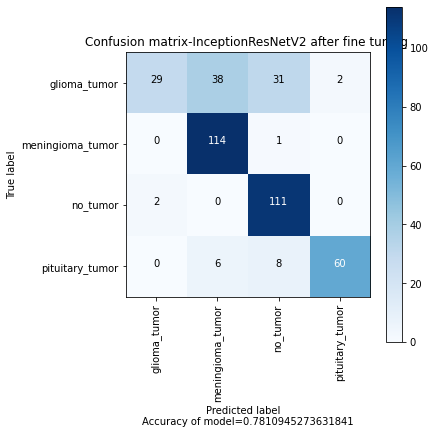

Accuracy of model=0.7810945273631841


In [ ]:
import itertools
from itertools import chain
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-InceptionResNetV2 after fine tuning ',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=90)
    plt.yticks(tick_marks, CATEGORIES)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label   \nAccuracy of model='+str(ac))
    plt.show()


cm=confusion_matrix(y_test, y_pred_test_classes)
plot_confusion_matrix(cm, y_pred_test_classes)
print("Accuracy of model="+str(ac))